In [1]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [10]:
from datasets import load_dataset

minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

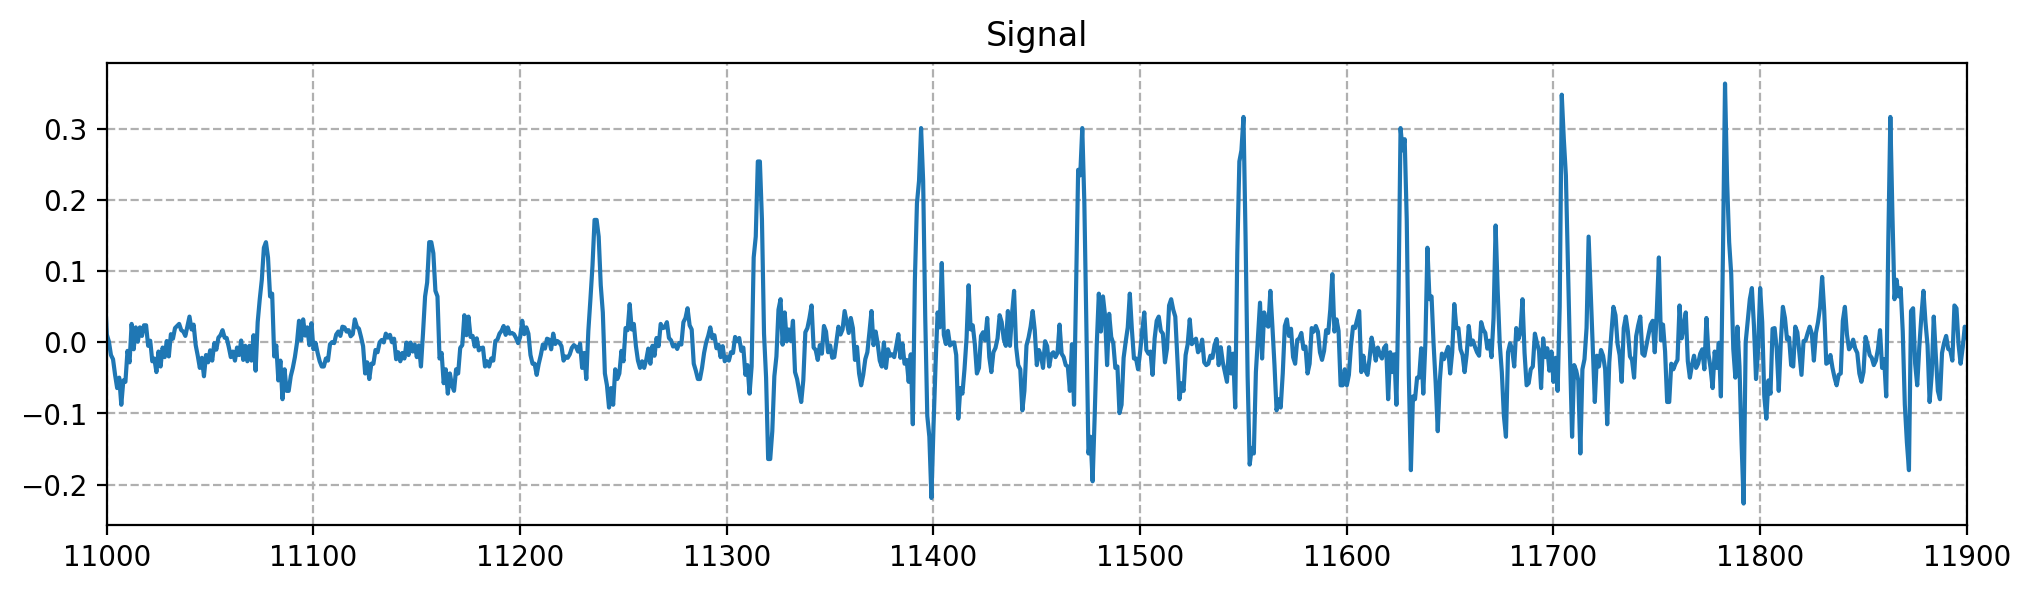

In [56]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
fig, ax = plt.subplots(figsize = (12,3))
plt.plot(minds[20]['audio']['array'])
plt.xlim(11000,11900)
plt.grid(linestyle = '--')
plt.title("Signal")
plt.show()

In [1]:
import logging
import struct
import sys
import wave
from dataclasses import dataclass
from typing import Any, Generator

import numpy as np
import pyaudio
import math

@dataclass
class AudioRecorder:
    """
    Desc: Record audio from microphone
    Args:
        chunk_size: number of samples per chunk
        audio_format: pyaudio audio format
        channels: number of channels
        rate: sampling rate, we use 16000 Hz which is required by Whisper model
        
    Methods:
        gen_chunks: generate audio chunks from microphone, this generator returns audio samples as list
    """
    
    chunk_size:int = 1024
    audio_format:Any = pyaudio.paInt16
    channels:int = None
    rate:int = 16000
    
    def __post_init__(self):   
        if self.channels is None:
            self.channels = 1 if sys.platform == 'darwin' else 2
        self.p = pyaudio.PyAudio()
        
    def gen_chunks(self, seconds:int = 10) -> Generator[list, None, None]:
        stream = self.p.open(
            format=self.audio_format, 
            channels=self.channels, 
            rate=self.rate, 
            input=True)
        
        print('Recording...')
        # calculate the number of chunks
        n_chunks = math.ceil(seconds * self.rate / self.chunk_size)
        for i in range(n_chunks):
            chunk = stream.read(self.chunk_size)
            fmt = f"{len(chunk) // 2}h"
            samples = struct.unpack(fmt, chunk)
            samples = np.array(samples, dtype = np.int16)
            if self.channels == 2:
                samples = samples.reshape(-1, 2)
                samples = samples.mean(axis=1).astype(np.int16)
            samples = samples / 32768.0
            print(f"Chunk {i} length: ", len(samples))
            yield np.array(samples)
        
        print('Recording Done...')
        stream.close()
        self.p.terminate()
        
    def record_and_save(self, seconds = 10):
        samples = []
        for chunk in self.gen_chunks(seconds):
            samples.extend(chunk)
        
        with wave.open("datafiles/recording.wav", "wb") as wf:
            wf.setnchannels(1)
            wf.setsampwidth(self.p.get_sample_size(self.audio_format))
            wf.setframerate(self.rate)
            wf.writeframes((np.array(samples) * 32768.0).astype(np.int16).tobytes())
        print("Recording saved as output.wav")

In [17]:
from datetime import datetime, timedelta
timedelta(minutes = 20, seconds = 10)

1210

In [3]:
import sys
sys.path.append("../")
from recordings import AudioRecorder

In [5]:
recorder = AudioRecorder()

chunks = [c for c in recorder.gen_chunks(10)]

Recording...
Recording Done...


In [11]:
chunks

[AudioChunk(chunk_id=1, relative_ts=0.064, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=2, relative_ts=0.128, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=3, relative_ts=0.192, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=4, relative_ts=0.256, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=5, relative_ts=0.32, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=6, relative_ts=0.384, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=7, relative_ts=0.448, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=8, relative_ts=0.512, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=9, relative_ts=0.576, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=10, relative_ts=0.64, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=11, relative_ts=0.704, data=array([0., 0., 0., ..., 0., 0., 0.])),
 AudioChunk(chunk_id=12, relative_ts=0.768,